**Fecha:** 17-08-2022

**Autor:**  *Ivan David Rodriguez Leiva*

**Materia:** *Métricas de rendimiento*

**Tópico:** *Regresión logistica en Machine Learning*

# **Introducción a Regresión Ligística**

*  **La tarea de prediccion es determinar si una persona tiene ingresos superiores a 50k o no al año**
* A continuacion se presentan los pasos pata tener en cuenta para determinar la tarea de clasificación


### **Exploración y Análisis de los datos**

In [ ]:
# Se importan las biliotecas necesarias
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
from pandas.core.reshape.reshape import get_dummies

In [ ]:
# Se importa el dataset a un objeto dataframe y se visualiza
# El dataset no tiene el nombre de las columnas
# Se crea un vector con los nombres de las columnas
nombre_columnas = [ 'age',
                    'workclass',
                    'fnlwgt',
                    'education',
                    'education-num',
                    'marital-status',
                    'occupation',
                    'relationship',
                    'race',
                    'sex',
                    'capital-gain',
                    'capital-loss',
                    'hours-per-week',
                    'native-country',
                    'salary']
# Se importa a dataframe el dataset adult.data                    
df_censo_adulto = pd.read_csv('/content/adult_censo.csv', names=nombre_columnas, na_values=' ?')
df_censo_adulto.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Se importa a dataframe el dataset adult.data                    
df_censo_test = pd.read_csv('/content/adult_test.csv', names=nombre_columnas, na_values=' ?')
df_censo_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [ ]:
# Se procede a eliminar los valores desaparecidos
# Se obtiene indormación general de los dataframes
df_censo_adulto = df_censo_adulto.dropna()
df_censo_adulto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  salary          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Se hace una inspeccion visual sobre las categorias df adult.data
# Se revisan las categorias existentes en cada "objeto"
# Primera categoria "workclass"


**Análisis del dataset adult.data**

* Se presentaron en el dataframe datos desaparecidos, se toma la decisión de eliminar los datos desaparecidos
* Se presentan 30162 registros no nulos
* Se presentan datos del tipo int64 y objetos, es decir, datos numericos y categóricos

In [ ]:
# Se oberva que el primer registro es irregular, aparentemente de la manipulación 
# intrusiva sobre del dataset, se procede a eliminar ese primer registo en el dataset 
# de prueba (test) <df_censo_test>
df_censo_test = df_censo_test.dropna()
# Pasamos la solumna edad a flotante
df_censo_test['age'] = df_censo_test['age'].astype(float)
df_censo_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             15060 non-null  float64
 1   workclass       15060 non-null  object 
 2   fnlwgt          15060 non-null  int64  
 3   education       15060 non-null  object 
 4   education-num   15060 non-null  int64  
 5   marital-status  15060 non-null  object 
 6   occupation      15060 non-null  object 
 7   relationship    15060 non-null  object 
 8   race            15060 non-null  object 
 9   sex             15060 non-null  object 
 10  capital-gain    15060 non-null  int64  
 11  capital-loss    15060 non-null  int64  
 12  hours-per-week  15060 non-null  int64  
 13  native-country  15060 non-null  object 
 14  salary          15060 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 1.8+ MB


**Análisis del dataset adult.data**

* Se presentaron en el dataframe datos desaparecidos, se toma la decisión de eliminar los datos desaparecidos
* Se presentan 15060 registros 
* Se presentan datos del tipo int64 y objetos, es decir, datos numericos y categóricos

In [ ]:
# Se hace revisión sobre los datos numéricos del dataframe adult.data
atributos_numericos = df_censo_adulto.select_dtypes(include=['int64'])
print(atributos_numericos)

       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
32556   27  257302             12             0             0              38
32557   40  154374              9             0             0              40
32558   58  151910              9             0             0              40
32559   22  201490              9             0             0              20
32560   52  287927              9         15024             0              40

[30162 rows x 6 columns]


In [ ]:
# Se hace revisión sobre los datos numéricos del dataframe adult.data
atributos_numericos_test = df_censo_test.select_dtypes(include=['float64'])
print(atributos_numericos_test.columns)

Index(['age'], dtype='object')


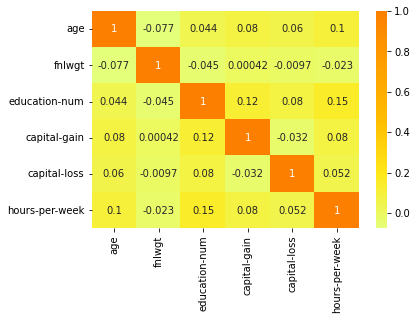

In [ ]:
# Correlacion plot: DATOS DE ENTRENAMIENTO
corr = df_censo_adulto.corr()
sns.heatmap(corr, cmap = 'Wistia', annot=True);

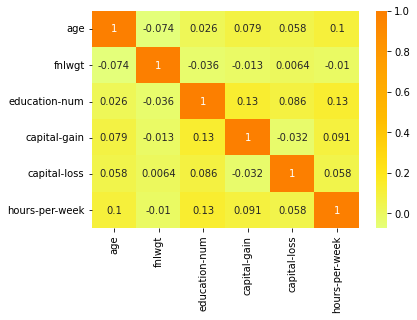

In [ ]:
# Correlacion plot: DATOS TESTEADOS
corr = df_censo_test.corr()
sns.heatmap(corr, cmap = 'Wistia', annot=True);

Se obseva del mapa de calor sobre la correlacion <person> que para ambos casos <test/train> la columna fnlwgt, presenta correlacion inversa o negativa. Se elimina la columna dado que advierte resultados que deterioran cualquier modelo de analisis o prediccion.

**Se procede a eliminar la columna fnlwgt.**


In [ ]:
df_censo_adulto.drop(['fnlwgt'], axis=1, inplace=True)
df_censo_test.drop(['fnlwgt'], axis = 1, inplace= True)

In [ ]:
#Se presenta el dataframe
df_censo_adulto.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#Se visualiza las cantidades de personas que ganan mas o menos de 50k
df_censo_adulto['salary'].value_counts()

 <=50K    22654
 >50K      7508
Name: salary, dtype: int64

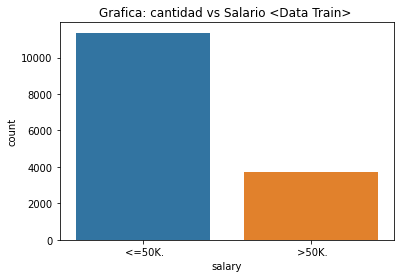

In [ ]:
sns.countplot(data = df_censo_test, x = 'salary')
plt.title('Grafica: cantidad vs Salario <Data Train> ')
plt.show()

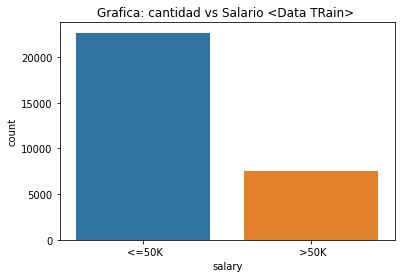

In [ ]:
sns.countplot(data = df_censo_adulto, x = 'salary')
plt.title('Grafica: cantidad vs Salario <Data TRain> ')
plt.show()

Se puede apreciar que existe un desbalance sobre la cantidad de personas que no ganan mas de 50k, en relaicones con las que si ganan mas.
La observacion prevalece sobre los dos dataframes <train/test> 

In [ ]:
#Se estudia la columna de 'education': son datos el tipo objeto 
df_censo_adulto['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [ ]:
df_censo_adulto['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12,  4, 16, 11, 15,  3,  6,  1,  8,  2])

**Observacion** La columna 'education' se presenta como datos *Nominales*, mientras que la columna education-num se presentan como datos *ordinales*.
Adicionalmente, ambas columnas dicen la misma informacion. Se procede a eliminar la columna de datos ordinales.

In [ ]:
df_censo_adulto.drop(['education'], axis=1, inplace=True)
df_censo_test.drop(['education'], axis = 1, inplace= True)
df_censo_adulto.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Manejo de datos categoricos**

Se hace la visualizacion de los datos categoricos y su incidencia sobre la preparacion de los datos en general.


In [ ]:
# Se hace la revision sobre los datos categoricos del df
atributos_categoricos = df_censo_adulto.select_dtypes(include=['object'])
print(atributos_categoricos.columns)

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'salary'],
      dtype='object')


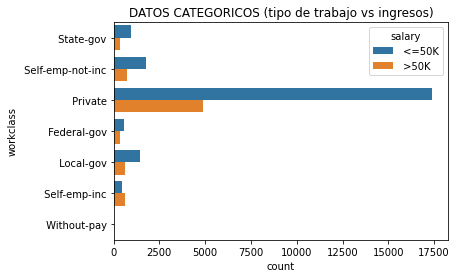

In [ ]:
# Se requiere hacer una visualizacion grafica sobre los datos categoricos.
sns.countplot(data = atributos_categoricos, hue='salary', y = 'workclass')
plt.title("DATOS CATEGORICOS (tipo de trabajo vs ingresos)")
plt.show()

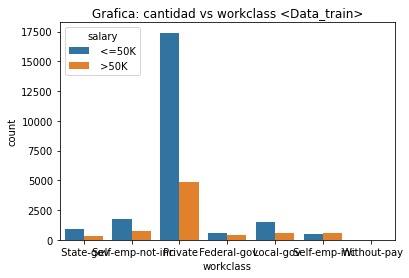

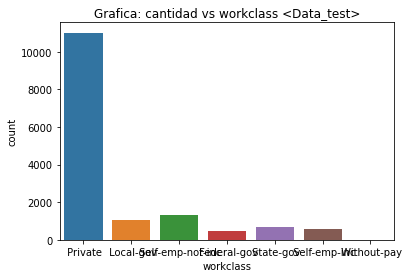

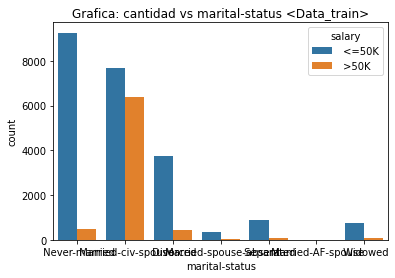

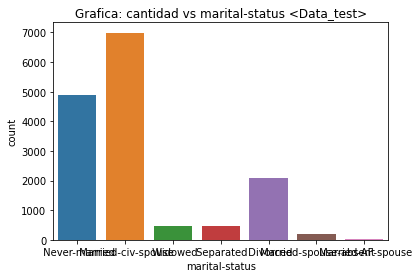

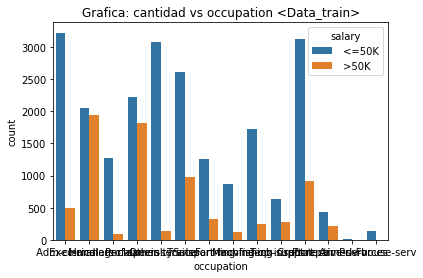

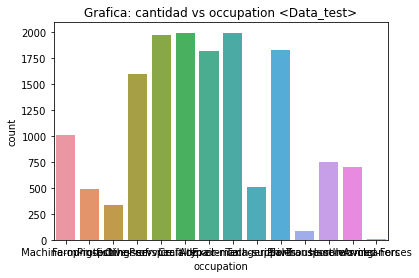

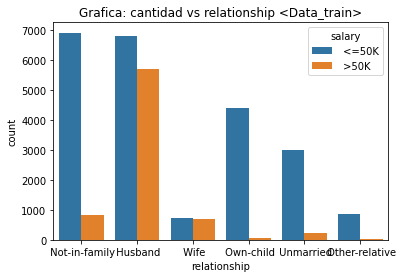

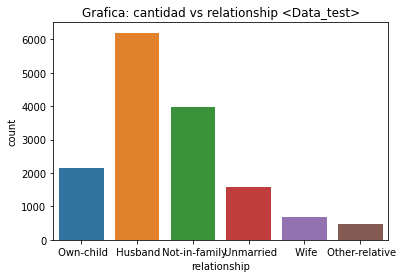

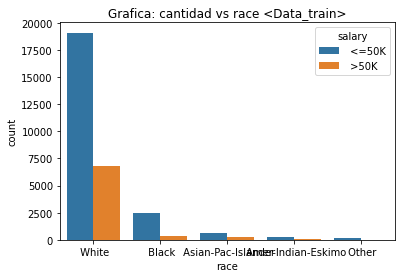

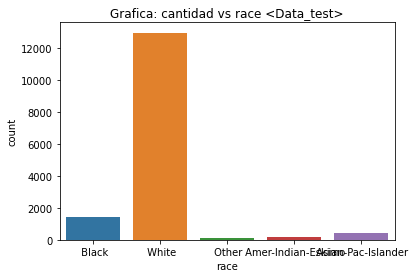

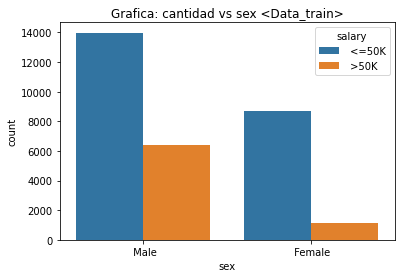

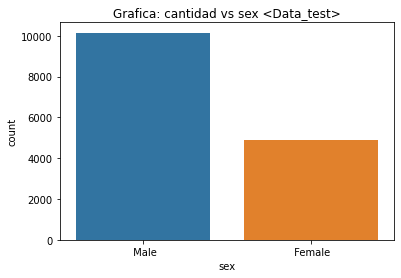

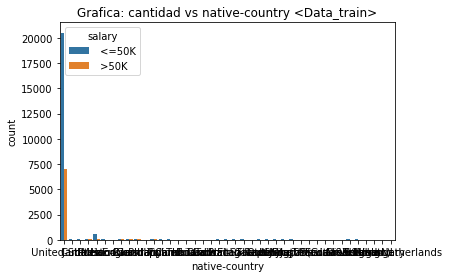

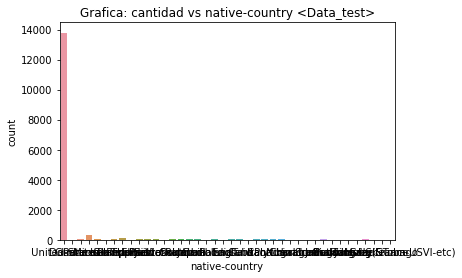

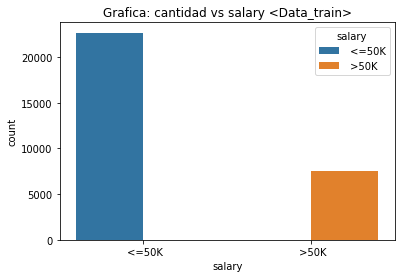

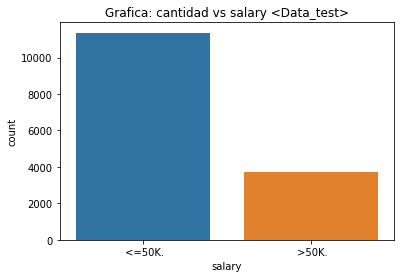

In [ ]:
for atributo in atributos_categoricos:
  sns.countplot(data = df_censo_adulto, x = atributo, hue='salary')
  plt.title('Grafica: cantidad vs '+atributo+' <Data_train>')
  plt.show()

  sns.countplot(data = df_censo_test, x = atributo)
  plt.title('Grafica: cantidad vs '+atributo+' <Data_test>')
  plt.show()

**OBSERVACIONES**

1. Existen mas hombres que mujeres en los dataframes.
2. La mayoria de las personas del censo son nativas EE.UU, luego aparecen personas de la India y Mexico. 
3. La raza blanca predomina sobre las demas razas. 

**VISUALIZACION SOBRE LAS VARIABLES AGE Y SALARY**


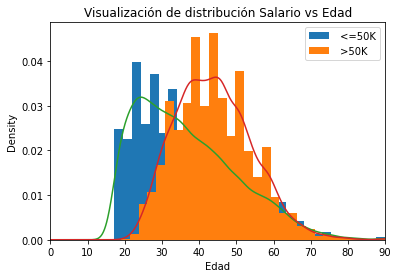

In [ ]:
# Se hacen dos graficas para ver el comportamiento de la distribucion del salario. 
fig, ax = plt.subplots()
ax.hist(df_censo_adulto[df_censo_adulto['salary'] ==' <=50K']['age'],bins = 30, density = True,label =' <=50K')
ax.hist(df_censo_adulto[df_censo_adulto['salary'] ==' >50K']['age'],bins = 30, density = True,label =' >50K')

# Se pinta la curva para revisar su distribucion kde
# La curva kde representa el como los datos se ajustan en una curva para determinar si tiene un comportamiento normal.  
# Distribucion normal gaussiana: Hace referencia a que el comportamiento esperado según el escenario. 
df_censo_adulto[df_censo_adulto['salary'] ==' <=50K']['age'].plot(kind ='kde',label = '',ax = ax)
df_censo_adulto[df_censo_adulto['salary'] ==' >50K']['age'].plot(kind ='kde',label = '',ax = ax)

# Ajuste de los ejes
ax.set_xlim(0,90)
ax.set_xlabel('Edad')
ax.set_title('Visualización de distribución Salario vs Edad')

plt.legend()
plt.show()

**VISUALIZACION SOBRE LAS VARIABLES CAPITAL-GAIN Y SALARY**

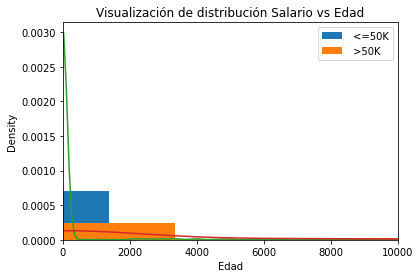

In [ ]:
# Se hacen dos graficas para ver el comportamiento de la distribucion del salario. 
fig, ax = plt.subplots()
ax.hist(df_censo_adulto[df_censo_adulto['salary'] ==' <=50K']['capital-gain'],bins = 30, density = True,label =' <=50K')
ax.hist(df_censo_adulto[df_censo_adulto['salary'] ==' >50K']['capital-gain'],bins = 30, density = True,label =' >50K')

# Se pinta la curva para revisar su distribucion kde
df_censo_adulto[df_censo_adulto['salary'] ==' <=50K']['capital-gain'].plot(kind ='kde',label = '',ax = ax)
df_censo_adulto[df_censo_adulto['salary'] ==' >50K']['capital-gain'].plot(kind ='kde',label = '',ax = ax)

# Ajuste de los ejes
ax.set_xlim(0,10000)
ax.set_xlabel('Edad')
ax.set_title('Visualización de distribución Salario vs Edad')

plt.legend()
plt.show()

**VISUALIZACION SOBRE LAS VARIABLES CAPITAL-LOSS Y SALARY**

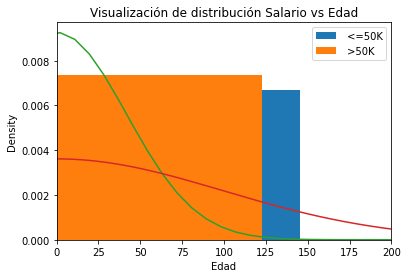

In [ ]:
# Se hacen dos graficas para ver el comportamiento de la distribucion del salario. 
fig, ax = plt.subplots()
ax.hist(df_censo_adulto[df_censo_adulto['salary'] ==' <=50K']['capital-loss'],bins = 30, density = True,label =' <=50K')
ax.hist(df_censo_adulto[df_censo_adulto['salary'] ==' >50K']['capital-loss'],bins = 30, density = True,label =' >50K')

# Se pinta la curva para revisar su distribucion kde
df_censo_adulto[df_censo_adulto['salary'] ==' <=50K']['capital-loss'].plot(kind ='kde',label = '',ax = ax)
df_censo_adulto[df_censo_adulto['salary'] ==' >50K']['capital-loss'].plot(kind ='kde',label = '',ax = ax)

# Ajuste de los ejes
ax.set_xlim(0,200)
ax.set_xlabel('Edad')
ax.set_title('Visualización de distribución Salario vs Edad')

plt.legend()
plt.show()

**COLUMNA 'SALARY'**

* La columna representa los datos del ingreso segun el censo de 1994 en USA.
* La columna se representa como la variable dependiente para el estudio.
* La columna muestra como variable categorica, la cual ha de transformarse en una variable binaria (0,1). Es decir, valores inferiores a $50k es igual 0, en caso contrario, es igual a 1. 
* Se decide hacer una funcion incognita o lambda, con la funcion apply de pandas sobre toda la columna 
* Se crea una columna nueva 'Ingresos' la cual sustituye a la columna 'salary' 


In [ ]:
df_censo_adulto['income'] = df_censo_adulto['salary'].apply(lambda x:0 if x== ' <=50k' else 1)
df_censo_test['income'] = df_censo_test['salary'].apply(lambda x:0 if x== ' <=50k' else 1)
df_censo_adulto.drop(['salary'],axis=1, inplace=True)
df_censo_test.drop(['salary'],axis=1, inplace=True)

In [ ]:
df_censo_adulto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education-num   30162 non-null  int64 
 3   marital-status  30162 non-null  object
 4   occupation      30162 non-null  object
 5   relationship    30162 non-null  object
 6   race            30162 non-null  object
 7   sex             30162 non-null  object
 8   capital-gain    30162 non-null  int64 
 9   capital-loss    30162 non-null  int64 
 10  hours-per-week  30162 non-null  int64 
 11  native-country  30162 non-null  object
 12  income          30162 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 4.2+ MB


**Se observan las cartacteristicas de las variables del tipo objeto pendientes**

In [ ]:
print(f"La columna 'workclass' tiene: \n {df_censo_adulto['workclass'].unique()}")
print(f"\nLa columna 'marital-status' tiene: \n {df_censo_adulto['marital-status'].unique()}")
print(f"\nLa columna 'occupations' tiene: \n {df_censo_adulto['occupation'].unique()}")
print(f"\nLa columna 'relationship' tiene: \n {df_censo_adulto['relationship'].unique()}")
print(f"\nLa columna 'race' tiene: \n {df_censo_adulto['race'].unique()}")
print(f"\nLa columna 'sex' tiene: \n {df_censo_adulto['sex'].unique()}")
print(f"\nLa columna 'native-country' tiene: \n {df_censo_adulto['native-country'].unique()}")

La columna 'workclass' tiene: 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']

La columna 'marital-status' tiene: 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

La columna 'occupations' tiene: 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']

La columna 'relationship' tiene: 
 [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

La columna 'race' tiene: 
 [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

La columna 'sex' tiene: 
 [' Male' ' Female']

La columna 'native-country' tiene: 
 [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Ge

**Se procede a tratar el fg de entrenamiento**

* Dada la revision sobre los datos categoricos (tipo objetos), se toma la decision de usar la imputacion basada en la funcion get_dummies de pandas.
* La funcion get_dummies convierte los datos categoricos en datos numericos. 
* La funcion get_dummies creará columnas llenas de ceros para las categorias que no esten presentes en la lista, por cada categoria de esa columna. 
* La transformacion tomara como argumento 'drop_first', la cual indica si deberia eliminar la primera columna despues de crear el dummy usando la funcion get_dummies
* Lo anterior, representa evitar la multicolinealidad.

**Se define una clase para el tratamiento completo, aplicando lo anterior.**

In [ ]:
#class DecodificadorCategorico(Estimador, TransformerMixin):
  #def _init_(self, dropFirst = True):
    #self.categories = dict()
    #self.dropFirst = dropFirst
  # Selector de tipo 

**Se procede a tratar el df de entrenamiento**
* Se hace un df por cada variable catefotica 
* Posteriormente se concatena con el df de entrenamiento
* Se eliminan las columnas categoricas

In [ ]:
# Decodificanco cada variable categorica 
df_work = pd.get_dummies(data = list(df_censo_adulto['workclass']))
df_marital = pd.get_dummies(data = list(df_censo_adulto['marital-status']))
df_occupation = pd.get_dummies(data = list(df_censo_adulto['occupation']))
df_relationship = pd.get_dummies(data = list(df_censo_adulto['relationship']))
df_race = pd.get_dummies(data = list(df_censo_adulto['race']))
df_sex = pd.get_dummies(data = list(df_censo_adulto['sex']))
df_native = pd.get_dummies(data = list(df_censo_adulto['native-country']))

In [ ]:
# Se procede a concatenar con el df de entrenamiento
df_censo_adulto = pd.concat([df_censo_adulto,df_work,df_marital,df_occupation,df_relationship,df_race,df_sex],axis=1)
df_censo_adulto.drop(['workclass','marital-status','occupation','relationship','race','sex','native-country'],axis=1,inplace=True)
df_censo_adulto.head() 

,age,education-num,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,Private,Self-emp-inc,...,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,39.0,13.0,2174.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,50.0,13.0,0.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,38.0,9.0,0.0,0.0,40.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,53.0,7.0,0.0,0.0,40.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28.0,13.0,0.0,0.0,40.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Se requiere que la columna de la variable dependiente "income" quede al final del dataframe. 
columnas = list(df_censo_adulto)
print(columnas.index('income'))

5


In [ ]:
columnas[5] = columnas[-1]
columnas_nuevas = list(columnas)
columnas_nuevas.append('income')
df_censo_adulto = df_censo_adulto[columnas_nuevas]
df_censo_adulto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32368 entries, 0 to 32560
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     30162 non-null  float64
 1   education-num           30162 non-null  float64
 2   capital-gain            30162 non-null  float64
 3   capital-loss            30162 non-null  float64
 4   hours-per-week          30162 non-null  float64
 5    Male                   30162 non-null  float64
 6    Federal-gov            30162 non-null  float64
 7    Local-gov              30162 non-null  float64
 8    Private                30162 non-null  float64
 9    Self-emp-inc           30162 non-null  float64
 10   Self-emp-not-inc       30162 non-null  float64
 11   State-gov              30162 non-null  float64
 12   Without-pay            30162 non-null  float64
 13   Divorced               30162 non-null  float64
 14   Married-AF-spouse      30162 non-null

In [ ]:
# Decodificanco cada variable categorica 
df_work = pd.get_dummies(data = list(df_censo_test['workclass']))
df_marital = pd.get_dummies(data = list(df_censo_test['marital-status']))
df_occupation = pd.get_dummies(data = list(df_censo_test['occupation']))
df_relationship = pd.get_dummies(data = list(df_censo_test['relationship']))
df_race = pd.get_dummies(data = list(df_censo_test['race']))
df_sex = pd.get_dummies(data = list(df_censo_test['sex']))

In [ ]:
# Se procede a concatenar con el df de entrenamiento
df_censo_test = pd.concat([df_censo_test,df_work,df_marital,df_occupation,df_relationship,df_race,df_sex],axis=1)
df_censo_test.drop(['workclass','marital-status','occupation','relationship','race','sex','native-country'],axis=1,inplace=True)
df_censo_test.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,Private,Self-emp-inc,...,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,25.0,7.0,0.0,0.0,40.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,38.0,9.0,0.0,0.0,50.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,28.0,12.0,0.0,0.0,40.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,44.0,10.0,7688.0,0.0,40.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
# Se requiere que la columna de la variable dependiente "income" quede al final del dataframe. 
columnas = list(df_censo_test)
print(columnas.index('income'))

5


In [ ]:
columnas[5] = columnas[-1]
columnas_nuevas = list(columnas)
columnas_nuevas.append('income')
df_censo_test = df_censo_test[columnas_nuevas]
df_censo_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16181 entries, 0 to 16280
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     15060 non-null  float64
 1   education-num           15060 non-null  float64
 2   capital-gain            15060 non-null  float64
 3   capital-loss            15060 non-null  float64
 4   hours-per-week          15060 non-null  float64
 5    Male                   15060 non-null  float64
 6    Federal-gov            15060 non-null  float64
 7    Local-gov              15060 non-null  float64
 8    Private                15060 non-null  float64
 9    Self-emp-inc           15060 non-null  float64
 10   Self-emp-not-inc       15060 non-null  float64
 11   State-gov              15060 non-null  float64
 12   Without-pay            15060 non-null  float64
 13   Divorced               15060 non-null  float64
 14   Married-AF-spouse      15060 non-null

#**Conclusiones**

* Se presentaron dos datset para pruebas y entrenamientos.
* Ambos dataset se trataron o analizaron de forma separada.
* Se encontraron en ambos datase variables categoricas y variables numericas. 
* Las variables numericas fueron analizadas y se visualizó su comportamiento con graficas y resumen estadistico. El proposito es revisar la relacion entre las varibales y descartar aquellas que no influian o deterioraban las relaciones. 
* Adicionalmente, en las variables numericas se observó el comportamiento en realcion a la distribucion. Lo anterior, se reflejo en el estudio sobre las variables "age" y "salary". 
* Se encuentra que la variable dependiente es del tipo categorico. Se procede a pasarla a variable numerica, conservando su dicotomia binaria (0,1). 
* Para el entrenamiento de las variables categoricas, se hizo uso de la funcion de pandas: **get_dummies**.
* Para ambos casos de los dataframes (train y test) se eliminaran los datos desaparecidos o imposibles, dado que no representaban mas del 1.5% de los datos. 
* La columna "native-country" se eliminó, para evitar crecer el dataframe de valores o variables las cuales no representaban mas del 1% de los datos de variable "native-country". Es decirm que la gran mayoria de personas son del pais USA, pais de origen del censo del 1994. 
* Finalmente, el dataframe para ambos casos (train y test) quedo preprocesado con 46 variables independientes del tipo "float64" y 1 variable dependiente igualmente del tipo "float64".